In [29]:
import numpy as np
import matplotlib.pyplot as plt


# Experimental section

In [30]:
def print_coloring_stats(J, binary_solutions):
    # Count number of times adjacent nodes share a color
    coloring_match = np.sum(J * (binary_solutions @ binary_solutions.T)) // 2  # Avoid double-counting
    
    # Count number of nodes assigned more than one color
    coloring_repeat = np.sum(np.sum(binary_solutions, axis=1) > 1)
    
    print("Number of times two adjacent nodes have the same color:", coloring_match)
    print("Number of times one node is assigned more than one color:", coloring_repeat)


In [31]:

J = np.array([[0, 0, 1, 0, 1],
         [0, 0, 0, 1, 1],
         [1, 0, 0, 0, 1],
         [0, 1, 0, 0, 1],
         [1, 1, 1, 1, 0]])

num_colors = 3

steps=1000
a0=1.0
c0=1.0 
dt=0.01
gradient_list = []
x_max_list = []
y_max_list = []
x_min_list = []
y_min_list = []

# Get problem size
N = J.shape[0]

# Initialize positions and momenta
x = np.random.uniform(-0.5, 0.5, (N, num_colors))  # Position variables
y = np.zeros((N, num_colors))                 # Momentum variables

coupling = np.zeros((N, num_colors)) 

# Define a(t) function - linear increase from 0 to a0
def a_t_func(t):
    return min(a0 * t / (0.2 * steps * dt), a0)

def get_coupling(J, x):
    coloring_match = np.sum(J * (x @ x.T > 0)) // 2  # Count pairs where adjacent nodes share a color
    coloring_repeat = np.sum(np.sum(x > 0, axis=1) > 1)  # Count nodes with multiple colors
    return coloring_match*x + coloring_repeat*x

    

# Main simulation loop
for step in range(1, steps + 1):
    t = step * dt
    a_t = a_t_func(t)
    
    # First part of symplectic Euler: update momenta
    # ẏ_i = -[a0 - a(t)]x_i + c0 ∑J_ij*x_j
    coupling = get_coupling(J,x)
    y -= dt * ((a0 - a_t) * x - c0 * coupling)
    
    # Second part: update positions
    # ẋ_i = a0 * y_i
    x += dt * a0 * y

    interaction_sum = (J @ np.sign(x)).sum()
    gradient_list.append(interaction_sum)
    
    # Apply inelastic walls: for any |x_i| > 1
    outside_range = np.abs(x) > 1.0
    if np.any(outside_range):
        # Replace with sign (±1)
        x[outside_range] = np.sign(x[outside_range])
        # Set corresponding momenta to 0
        y[outside_range] = 0.0
    


    x_max_list.append(x.max())
    y_max_list.append(y.max())
    x_min_list.append(x.min())
    y_min_list.append(y.min())

binary_solution = np.sign(x)



print_coloring_stats(J, binary_solution)
binary_solution

Number of times two adjacent nodes have the same color: -6.0
Number of times one node is assigned more than one color: 1


array([[-1.,  1.,  1.],
       [-1.,  1., -1.],
       [ 1., -1., -1.],
       [ 1.,  1.,  1.],
       [ 1., -1.,  1.]])

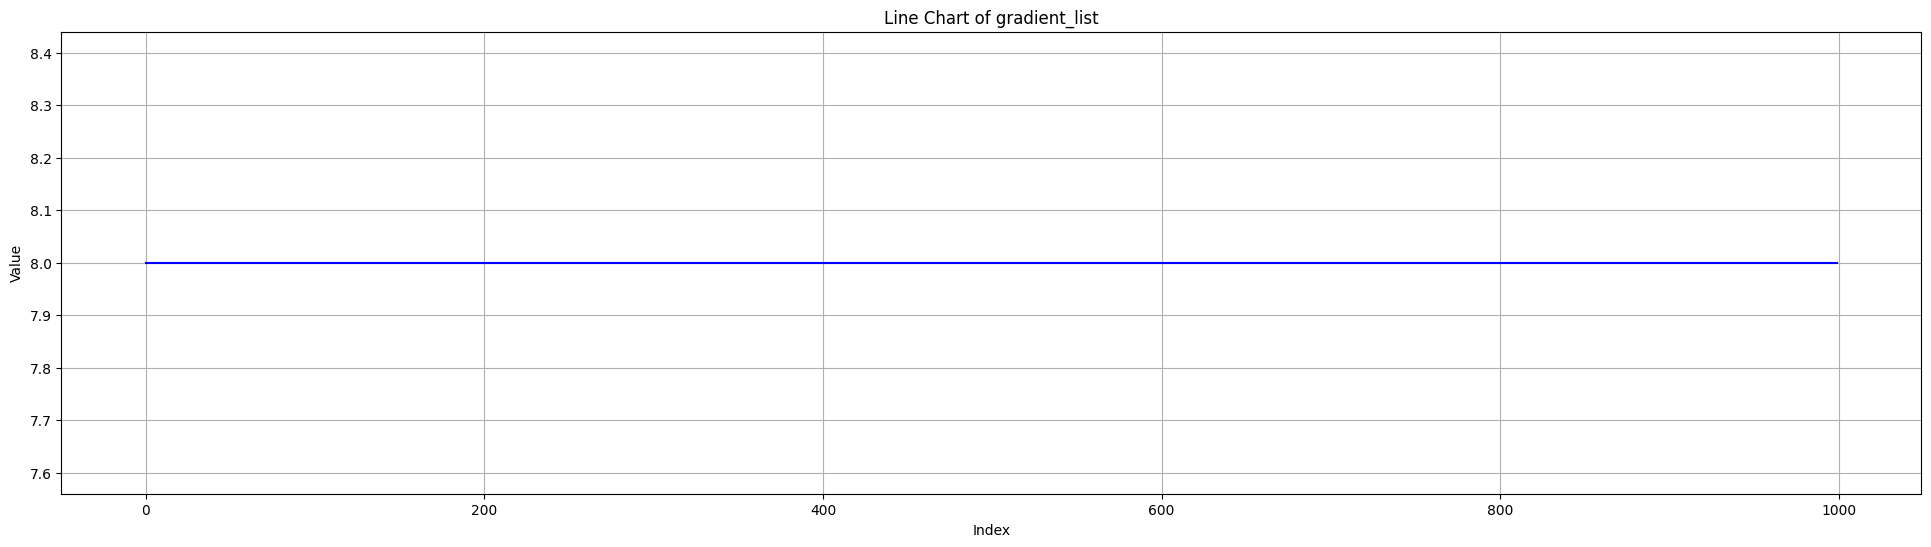

[[-1.  1.  1.]
 [-1.  1. -1.]
 [ 1. -1. -1.]
 [ 1.  1.  1.]
 [ 1. -1.  1.]]


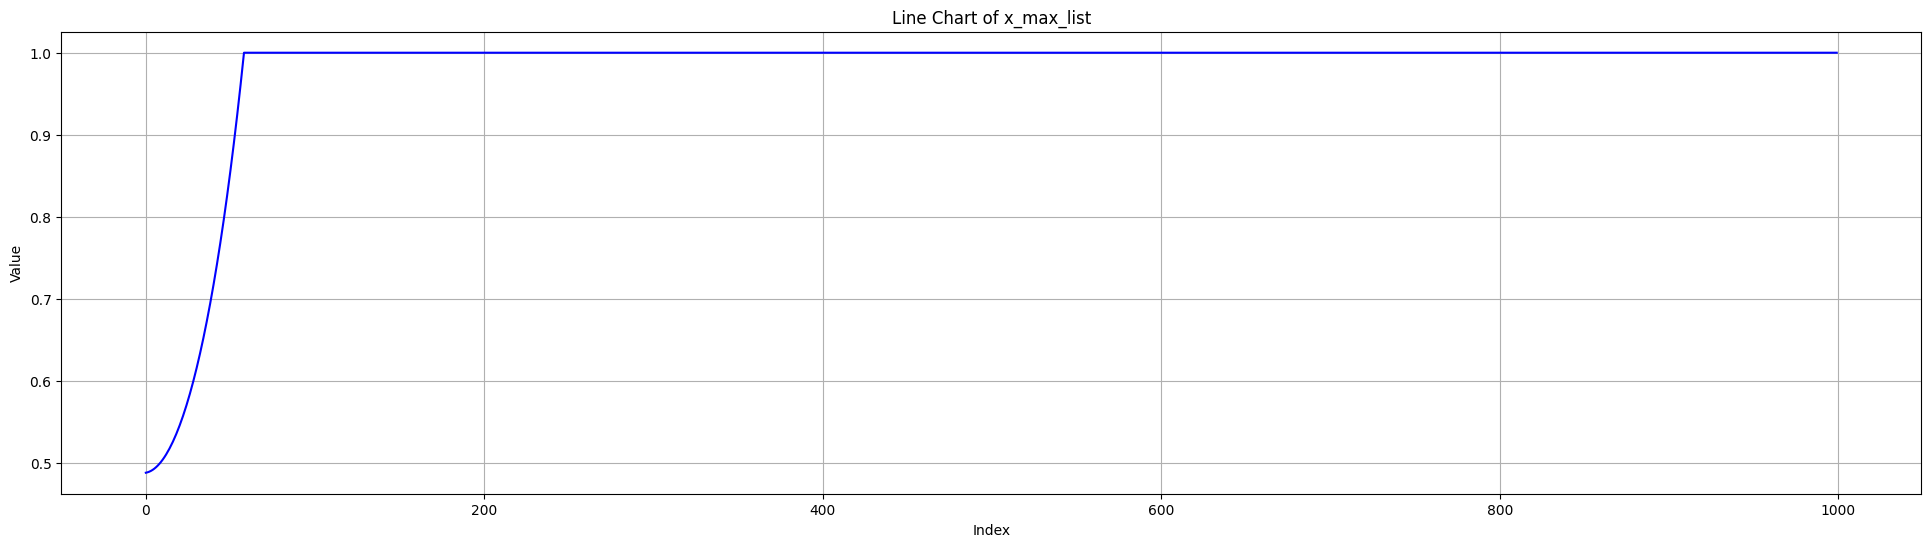

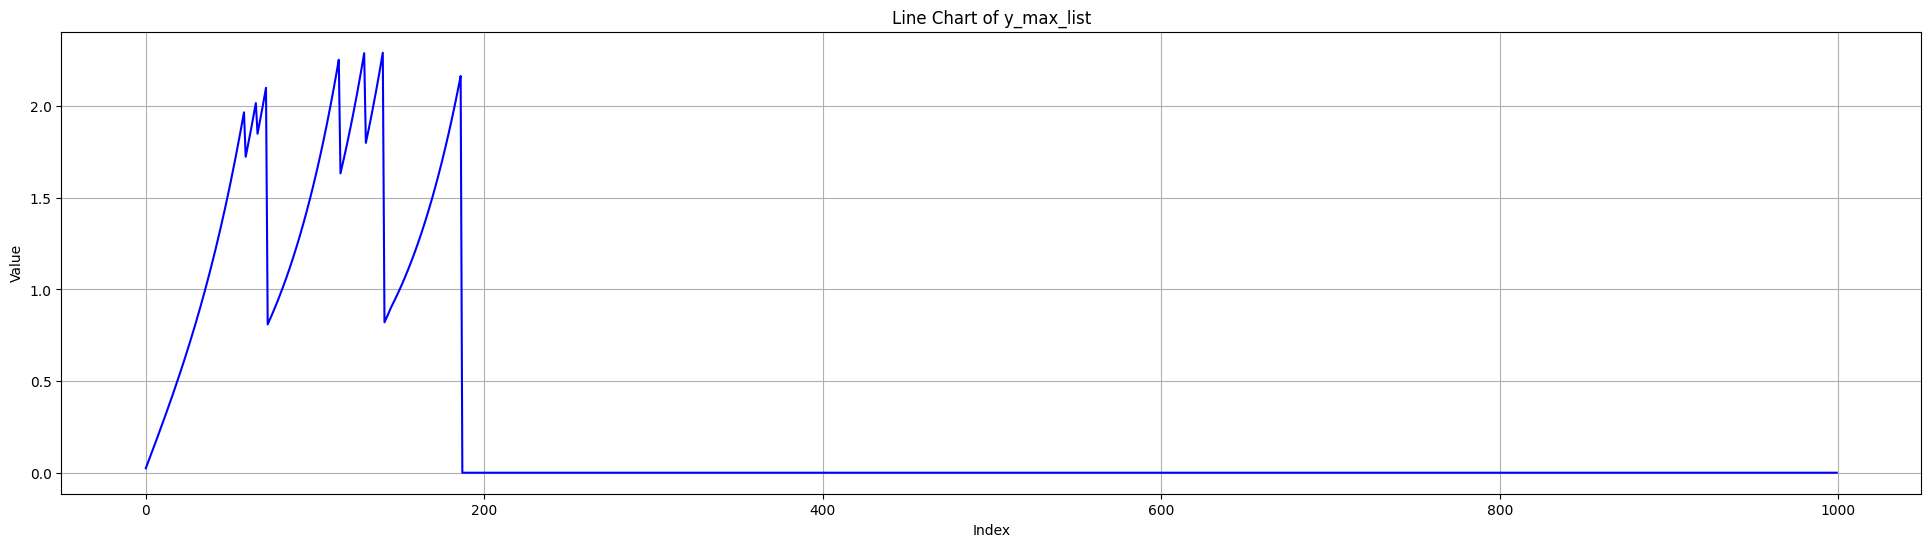

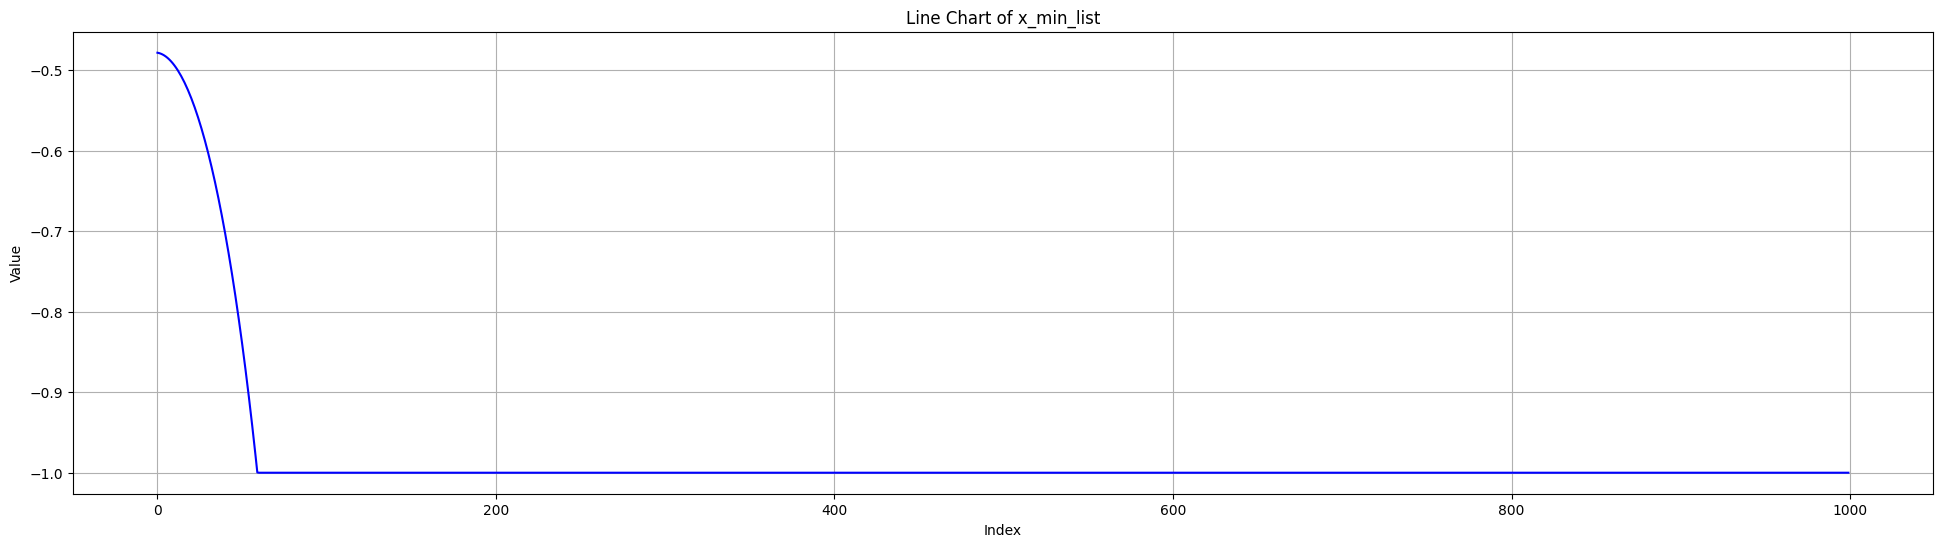

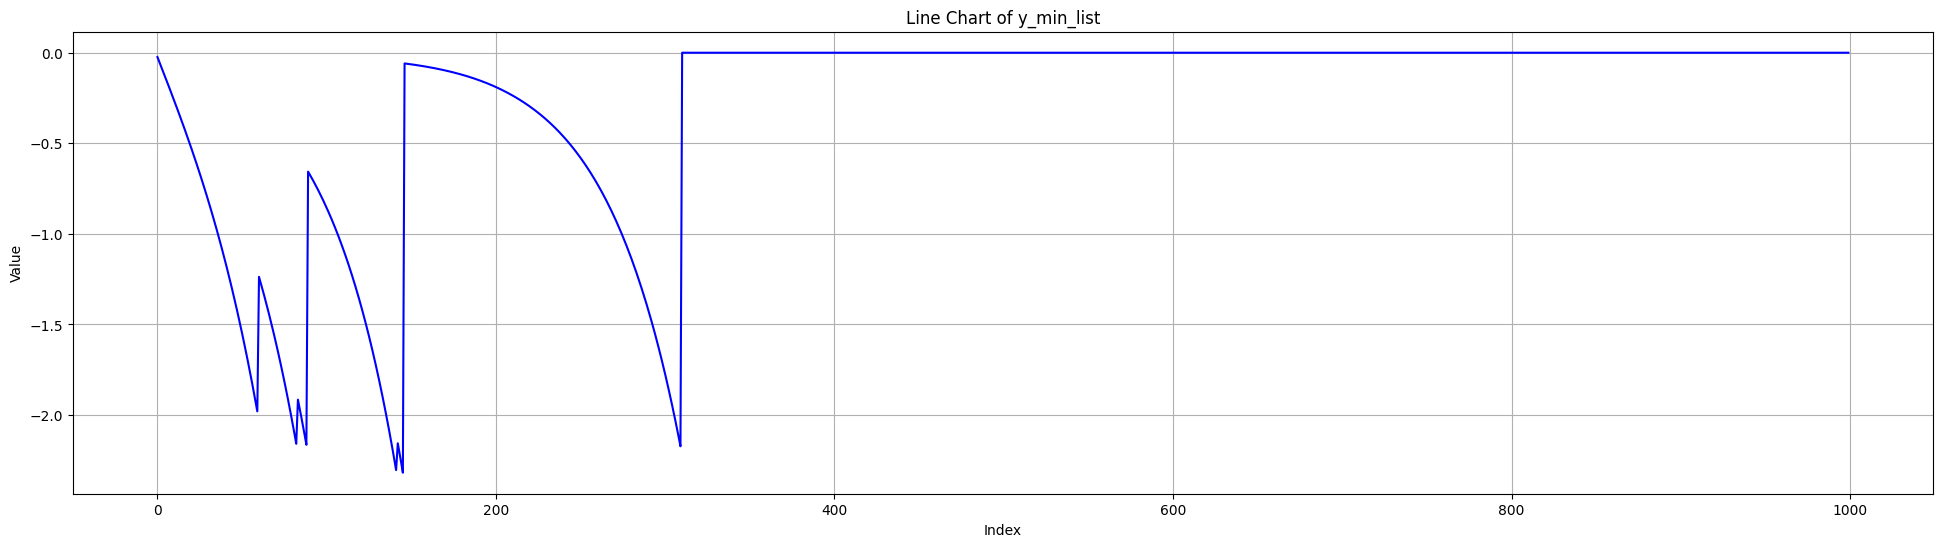

In [32]:
plt.figure(figsize=(24, 6))  # Set width to 24 and height to 6
plt.plot(gradient_list, linestyle='-', color='b')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Line Chart of gradient_list")
plt.grid(True)
plt.show()

print(binary_solution)

plt.figure(figsize=(24, 6))  # Set width to 24 and height to 6
plt.plot(x_max_list, linestyle='-', color='b')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Line Chart of x_max_list")
plt.grid(True)
plt.show()



plt.figure(figsize=(24, 6))  # Set width to 24 and height to 6
plt.plot(y_max_list, linestyle='-', color='b')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Line Chart of y_max_list")
plt.grid(True)
plt.show()

plt.figure(figsize=(24, 6))  # Set width to 24 and height to 6
plt.plot(x_min_list, linestyle='-', color='b')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Line Chart of x_min_list")
plt.grid(True)
plt.show()



plt.figure(figsize=(24, 6))  # Set width to 24 and height to 6
plt.plot(y_min_list, linestyle='-', color='b')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Line Chart of y_min_list")
plt.grid(True)
plt.show()
